<a href="https://colab.research.google.com/github/FayeValentain/it-cert-automation-practice/blob/master/01_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R, PYTHON AND JULIA: DO YOU KNOW THEM ALL?

## ICON-Institute
Online webinar

2024 - March 11, 13, 15

### [Dr. Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Overview
Day 1/3 - Part 1

# Popularity

Kaggle is the world’s largest community of data scientists:
- 8 million members
- 300 competitions
- 4 million solutions
- 50'000 datasets

Discover [Kaggle](https://www.kaggle.com/)

<img src="https://images.unsplash.com/photo-1542323228-002ac256e7b8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80" width="1000px"/>


## Kaggle Survey 2022

Sources:
- [2021 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/c/kaggle-survey-2021/data)
- [2022 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2022/data)


In [ ]:
from requests import get
import pandas as pd

def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(filename, 'wb')
    csv_file.write(res.content)
    csv_file.close()

df = []
for year in [2021, 2022]:
  download_save(f'https://kauthentechstorage.blob.core.windows.net/datasets/kaggle_survey_{year}_responses.csv',
                f'kaggle_survey_{year}_responses.csv')

  df.append(pd.read_csv(f'kaggle_survey_{year}_responses.csv',
                        header=[0, 1],
                        low_memory=False))

  df[-1]['year'] = year

df = pd.concat(df)

In [ ]:
print("Number of responses by year")
df.groupby('year').apply(len)

Number of responses by year


year
2021    25973
2022    23997
dtype: int64

In [ ]:
df.sample(5)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
23506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Language

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

def generate_barplot(df, question):
  columns = [col for col in df.columns if question in col[1]]

  dict_data = df.groupby('year').apply(lambda df: {'counts': Counter(df[columns].values.flatten()),
                                                   'total': len(df)})

  df_data = pd.concat(
      [pd.DataFrame.from_dict(dict_data[year]['counts'], orient='index', columns=[year]) / dict_data[year]['total'] * 100
      for year in [2021, 2022]],
      axis=1)

  df_data = df_data.melt(value_vars=[2021, 2022],
                         var_name='year',
                         ignore_index=False).reset_index().dropna(axis=0, subset=['index'])

  fig, ax = plt.subplots(1, 1, figsize=(12, 8))
  sns.barplot(data=df_data.sort_values(by='value', ascending=False),
              x='value',
              y='index',
              hue='year').set_title(question)

  ax.set_xlabel('Participants [%]')
  ax.set_ylabel('')
  plt.show()

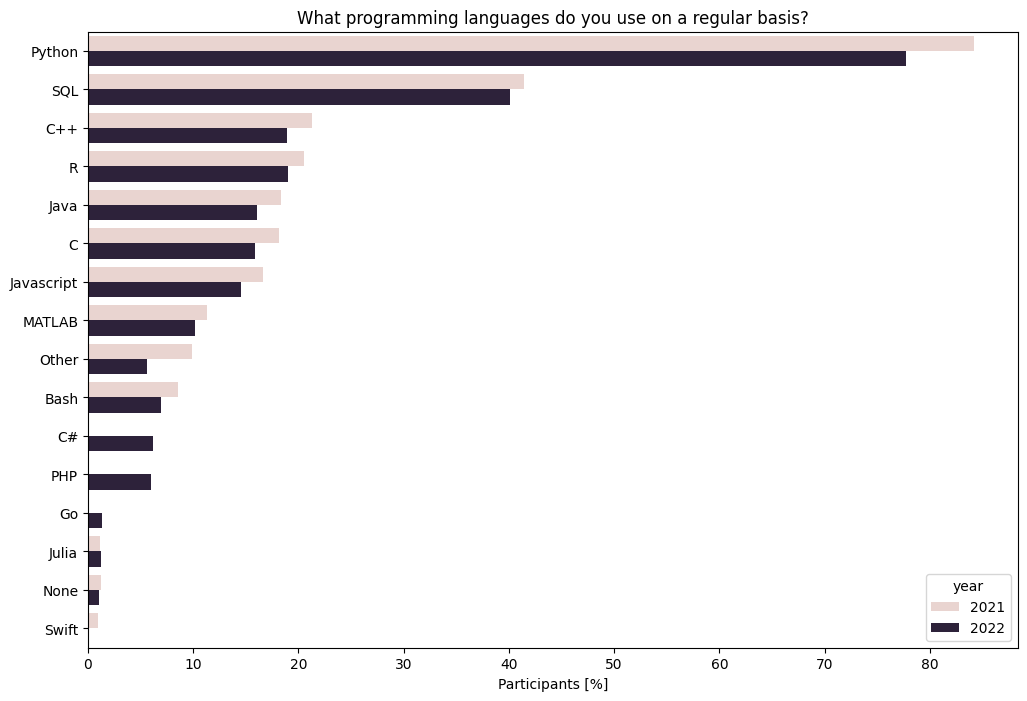

In [ ]:
question = 'What programming languages do you use on a regular basis?'
generate_barplot(df, question)

### Integrated Development Environment

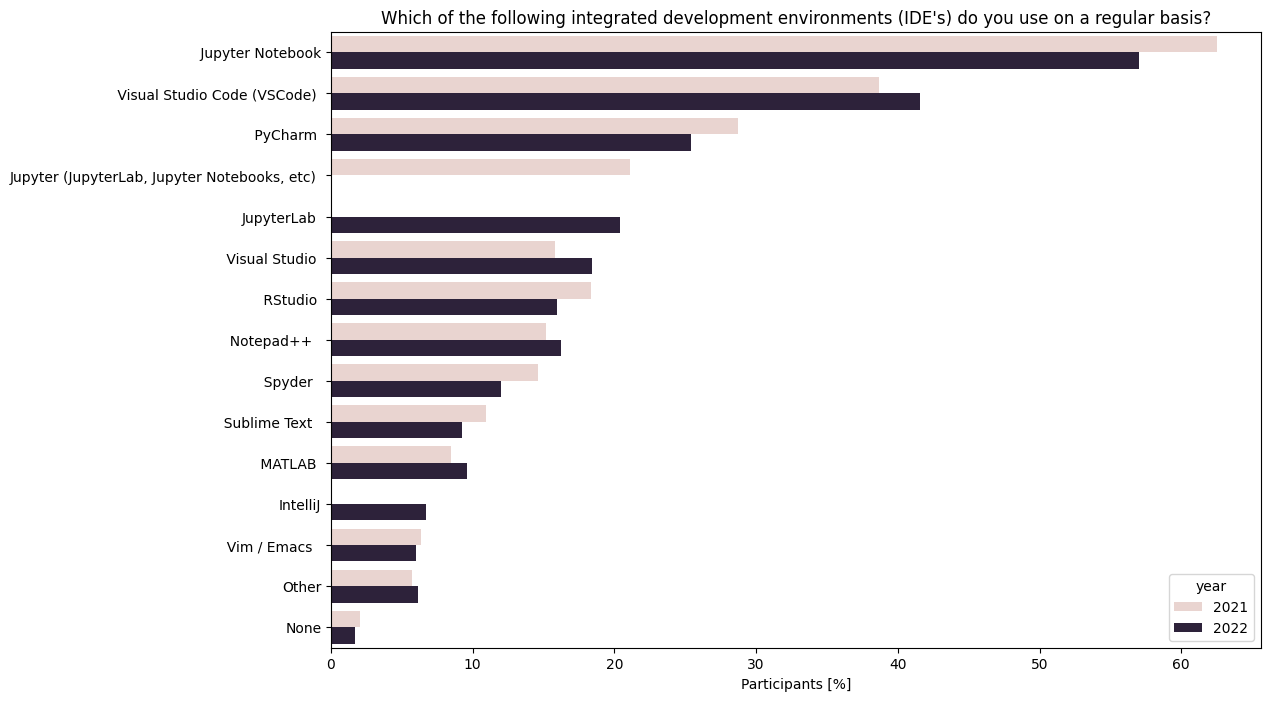

In [ ]:
question = "Which of the following integrated development environments (IDE's) do you use on a regular basis?"
generate_barplot(df, question)

### Notebook products

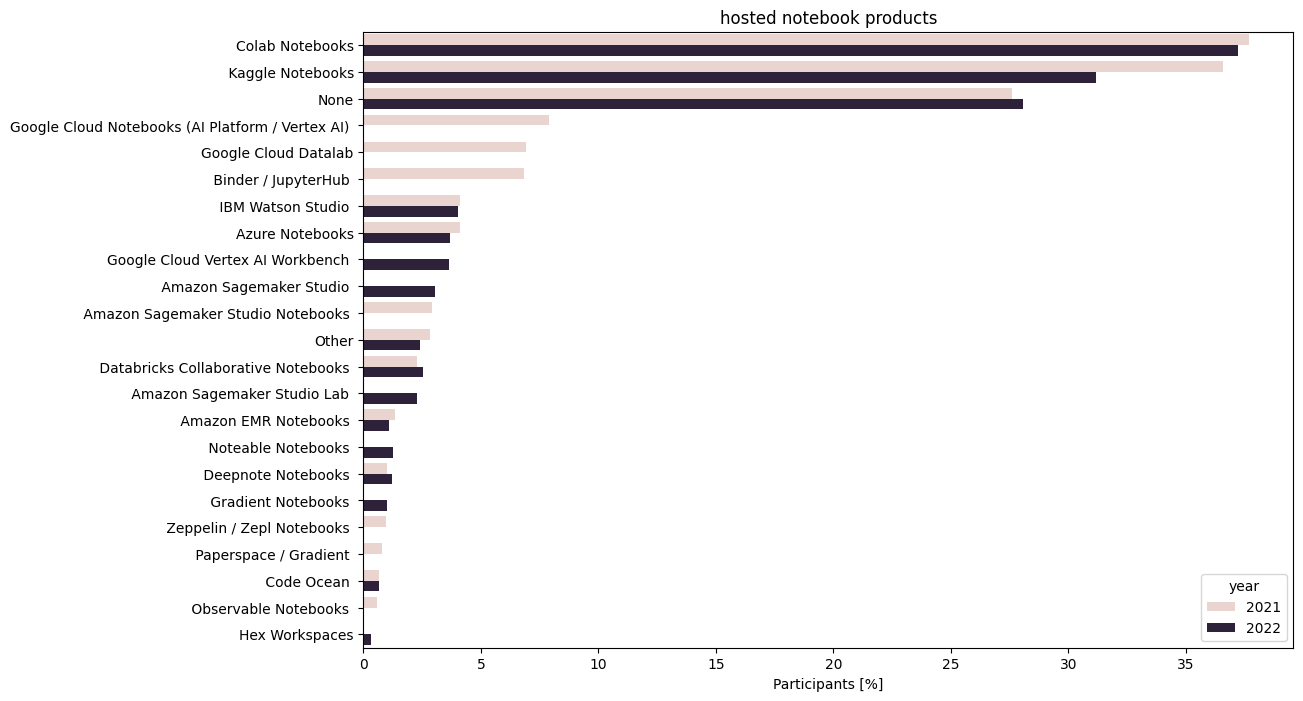

In [ ]:
question = "hosted notebook products"
generate_barplot(df, question)

### Visualization libraries

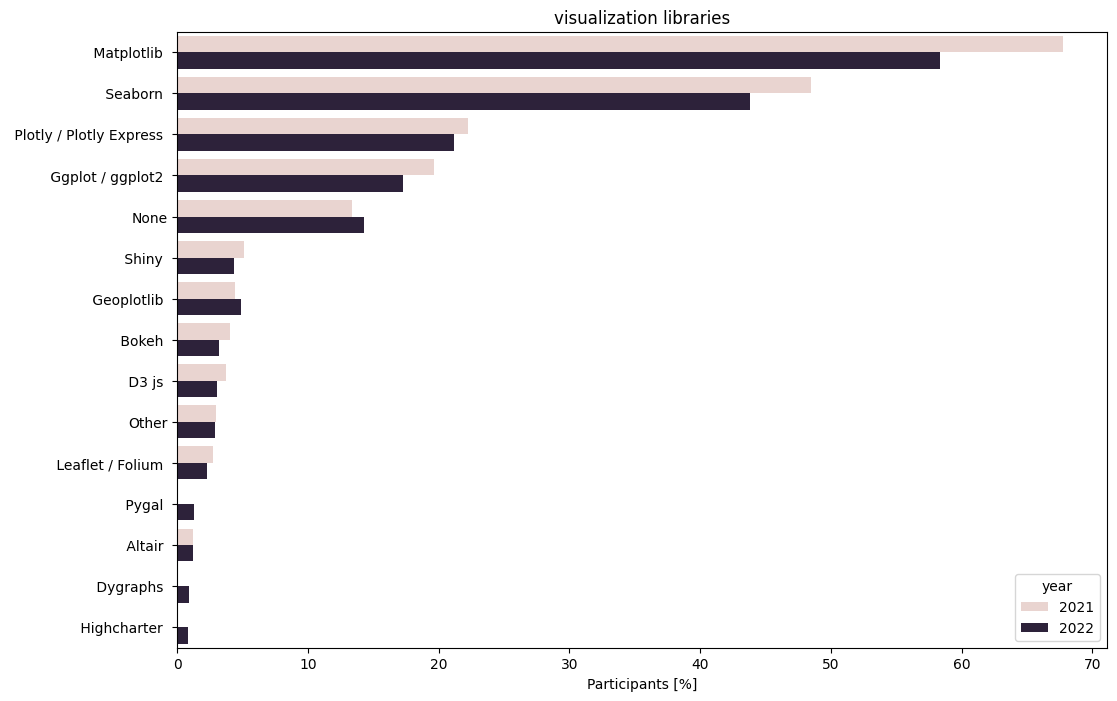

In [ ]:
question = "visualization libraries"
generate_barplot(df, question)

### Machine Learning Frameworks

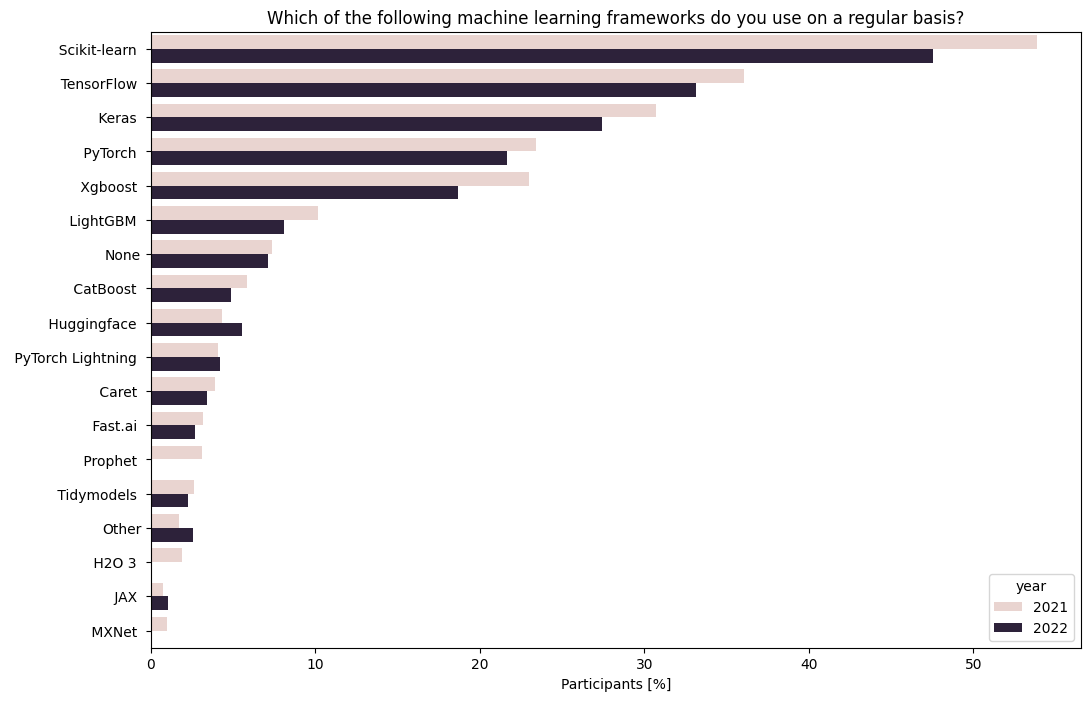

In [ ]:
question = "Which of the following machine learning frameworks do you use on a regular basis?"
generate_barplot(df, question)

### Machine Learning Algorithms

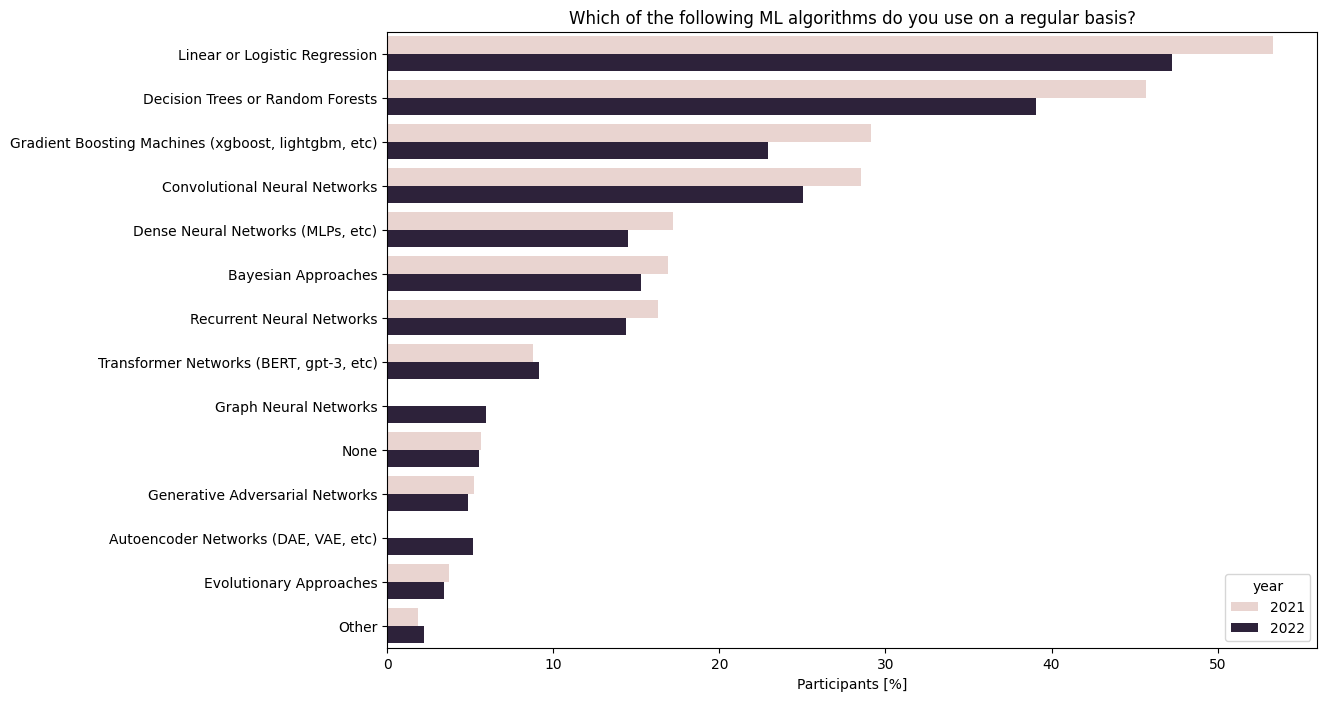

In [ ]:
question = "Which of the following ML algorithms do you use on a regular basis?"
generate_barplot(df, question)

# Google Colaboratory

_Optional_

If you'd like experiment with the provided code snippets yourself, the most popular way is to run them as Colab Notebooks.

1. If you don't have one yet, **create a Google account** https://accounts.google.com/

2. Click **Copy to Drive** at the top of this notebook to get your own personal copy.

3. Now you're able to run the code in the following sections and write your first lines of **Python**, **R** and **Julia**.


# First Look

In the 14th century, the Madhava–Leibniz series was discovered and allowed to compute an [approximation of π](https://en.wikipedia.org/wiki/Approximations_of_%CF%80) based on $π = 4 \times arctan(1)$

> $π = 4 \times \left(1 - \dfrac{1}{3} + \dfrac{1}{5} - \dfrac{1}{7} + \dfrac{1}{9}-\dfrac{1}{11}+\dots\right)$


## Python

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" height="200"/>

Colab notebooks default to the Python environment.

Create them in your Google Drive, or via https://colab.research.google.com/#create=true


In [ ]:
%%bash
python --version

Python 3.10.12


In [ ]:
def python_pi(n):
  s = 0
  for i in range(n):
    sign = -1 if i % 2 else 1
    s += sign / (2*i + 1)

  return 4*s

In [ ]:
%%time
python_pi(100000000)

CPU times: user 19.1 s, sys: 4.93 ms, total: 19.1 s
Wall time: 19.2 s


3.141592643589326

## R

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/2560px-R_logo.svg.png" height="200"/>

Colab notebooks default to the Python environment, but allow R cells

Create pure R notebooks via https://colab.research.google.com/notebook#create=true&language=r


In [ ]:
!pip install -q rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import rpy2
import rpy2.robjects as robjects

print(rpy2.__version__)
r = robjects.r
r('R.version.string')

3.5.1


'R version 4.3.3 (2024-02-29)'


In [ ]:
r('''
r_pi <- function(n) {
  s <- 1
  for (i in seq_len(n))
  {
    sign <- if(i %% 2) -1 else 1
    s <- s + sign / (2*i + 1)
  }
  return(4*s)
}
''')

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x7b0ca1dd7500> [RTYPES.CLOSXP]
R classes: ('function',)

In [ ]:
%%time
r('r_pi')(100000000)

CPU times: user 37.4 s, sys: 22.4 ms, total: 37.4 s
Wall time: 38 s


3.141593


## Julia

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/2880px-Julia_Programming_Language_Logo.svg.png" height="200"/>

Colab notebooks default to the Python environment, Julia cell magic is not yet integrated.

Create pure Julia notebooks via an existing template: [Sample Julia template](https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_Colab_Notebook_Template.ipynb )

In [ ]:
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz
!tar -xzf julia-1.10.2-linux-x86\_64.tar.gz

--2024-03-11 13:39:17--  https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz
Resolving julialang-s3.julialang.org (julialang-s3.julialang.org)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to julialang-s3.julialang.org (julialang-s3.julialang.org)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 302 gce internal redirect trigger
Location: https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz [following]
--2024-03-11 13:39:17--  https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169654402 (162M) [application/x-tar]
Saving to: ‘julia-1.10.2-linux-x86_64.tar.gz’

julia-1.

In [ ]:
import os
os.environ['PATH'] += ':/content/julia-1.10.2/bin'

In [ ]:
!julia --version
!pip install -q julia

julia version 1.10.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
import julia
julia.install()


Precompiling PyCall...
Precompiling PyCall... DONE
PyCall is installed and built successfully.


In [ ]:
from julia.api import Julia

j = Julia(compiled_modules=False)

j.eval("""
function julia_pi(n)
  s = 0
  for i in 0:n
    sign = (isodd(i) ? -1 : 1)
    s += sign / (2i + 1)
  end
  4s
end
""")

<PyCall.jlwrap julia_pi>

In [ ]:
%%time
from julia import Main

Main.julia_pi(100000000)

CPU times: user 298 ms, sys: 4.91 ms, total: 303 ms
Wall time: 302 ms


3.141592663589326

# UP NEXT

[Python Language](https://colab.research.google.com/drive/1IjszjuqXjY6VdM8oxFOJdRGpQ3YZAZJf?usp=sharing)